In [1]:
import pandas as pd
import time, datetime, tqdm
import matplotlib.pyplot as plt
import numpy as np
import pickle
import utils, plots, tools
plt.style.use("style.mplstyle")

# First Pumps-Off Period

In [2]:
path_to_save_plots = "/eos/user/j/jcapotor/DUNE-IFIC/Publications/ProtoDUNE-HD TMS performance/pumps_off/"

In [3]:
tini_1 = datetime.datetime(2024, 4, 30, 0, 0, 0)
tend_1 = datetime.datetime(2024, 5, 5, 0, 0, 0)
data_1, data_err_1 = utils.load_data(
    tini=tini_1,
    tend=tend_1
)

Text(0.5, 1.0, 'First Pumps-Off: Temperature Evolution')

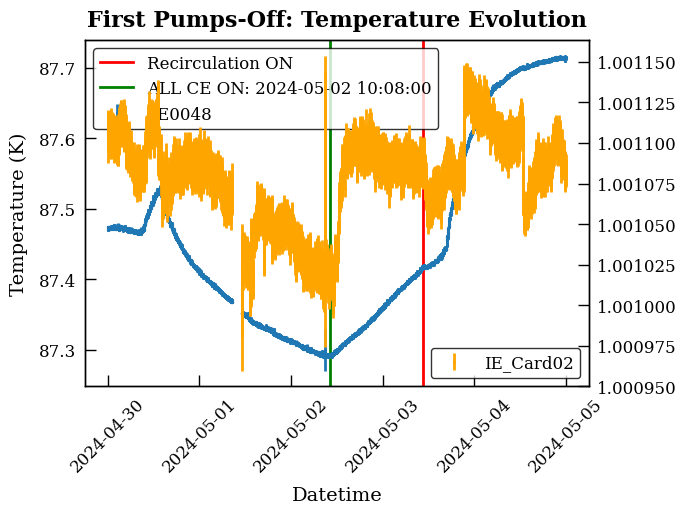

In [4]:
fig, axes = plt.subplots(1, 1)
plots.plot_temp_evolution(
    data=data_1, data_err=data_err_1, channel="TE0048",
    tmax=300, tmin=87.2, tmax_err=1,
    axes=axes
)
#axes.axvline(datetime.datetime(2024, 5, 3, 13, 30, 0), label="Recirculation ON", color="red")
#axes.axvline(datetime.datetime(2024, 12, 3, 14, 30, 0), label="Recirculation ON", color="orange")
axes2 = axes.twinx()
plots.plot_temp_evolution(
    data=data_1, data_err=data_err_1, channel="IE_Card02",
    tmax=1.0017, tmin=0.9, tmax_err=1,
    axes=axes2, color="orange"
)
axes.axvline(datetime.datetime(2024, 5, 3, 10, 30, 0), label="Recirculation ON", color="red")
axes.axvline(datetime.datetime(2024, 5, 2, 10, 8, 0), label=f"ALL CE ON: {datetime.datetime(2024, 5, 2, 10, 8, 0)}", color="green")
axes.legend()
axes2.legend(loc="lower right")
axes.set_xlabel("Datetime")
axes.set_ylabel("Temperature (K)")
axes.set_title("First Pumps-Off: Temperature Evolution")
# fig.savefig(f"{path_to_save_plots}np04_temp_evolution_TE0001.png", format="png")

Text(0.5, 1.0, 'First Pumps-Off: Temperature Evolution')

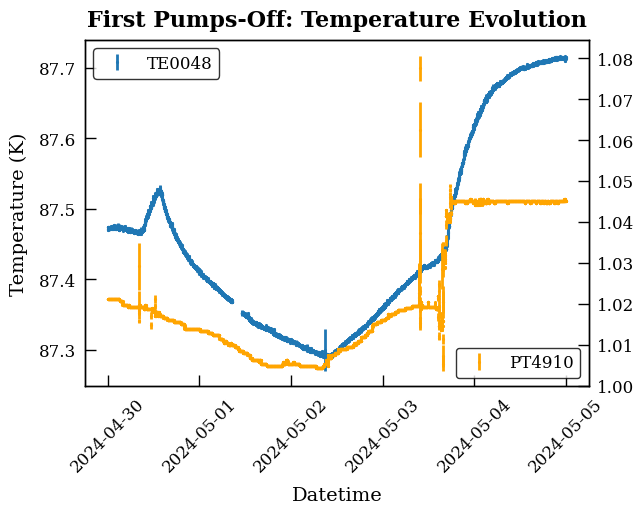

In [5]:
fig, axes = plt.subplots(1, 1)
plots.plot_temp_evolution(
    data=data_1, data_err=data_err_1, channel="TE0048",
    tmax=300, tmin=87.2, tmax_err=1,
    axes=axes
)
#axes.axvline(datetime.datetime(2024, 5, 3, 13, 30, 0), label="Recirculation ON", color="red")
#axes.axvline(datetime.datetime(2024, 12, 3, 14, 30, 0), label="Recirculation ON", color="orange")
axes2 = axes.twinx()
plots.plot_temp_evolution(
    data=data_1, data_err=data_err_1, channel="PT4910",
    tmax=1.4, tmin=0.9, tmax_err=1e-2,
    axes=axes2, color="orange"
)
# axes.axvline(datetime.datetime(2024, 5, 3, 10, 30, 0), label="Recirculation ON", color="red")
# axes.axvline(datetime.datetime(2024, 5, 2, 10, 8, 0), label=f"ALL CE ON: {datetime.datetime(2024, 5, 2, 10, 8, 0)}", color="green")
axes.legend()
axes2.legend(loc="lower right")
axes.set_xlabel("Datetime")
axes.set_ylabel("Temperature (K)")
axes.set_title("First Pumps-Off: Temperature Evolution")
# fig.savefig(f"{path_to_save_plots}np04_temp_evolution_TE0001.png", format="png")

/afs/cern.ch/work/j/jcapotor/software/rtd/pdhd/ana/tools.py:96: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['39666' '39665' '39664' '39667' '39661' '39660' '39655' '39654' '39653'
 '39652' '99999' '39651' '39650' '40526' '40525' '40524' '39659' '39658'
 '39657' '39649' '39648' '39647' '39646' '39644' '39630' '39629' '39628'
 '39627' '39626' '39625' '39624' '39623' '39622' '39621' '39620' '39619'
 '40533' '40530' '40531' '40529' '39614' '39613' '39612' '39611' '39610'
 '39609' '39608' '39607']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  selection_end.loc[:, "CAL-ID"] = selection_end["CAL-ID"].astype(int).astype(str)


Profile not saved.


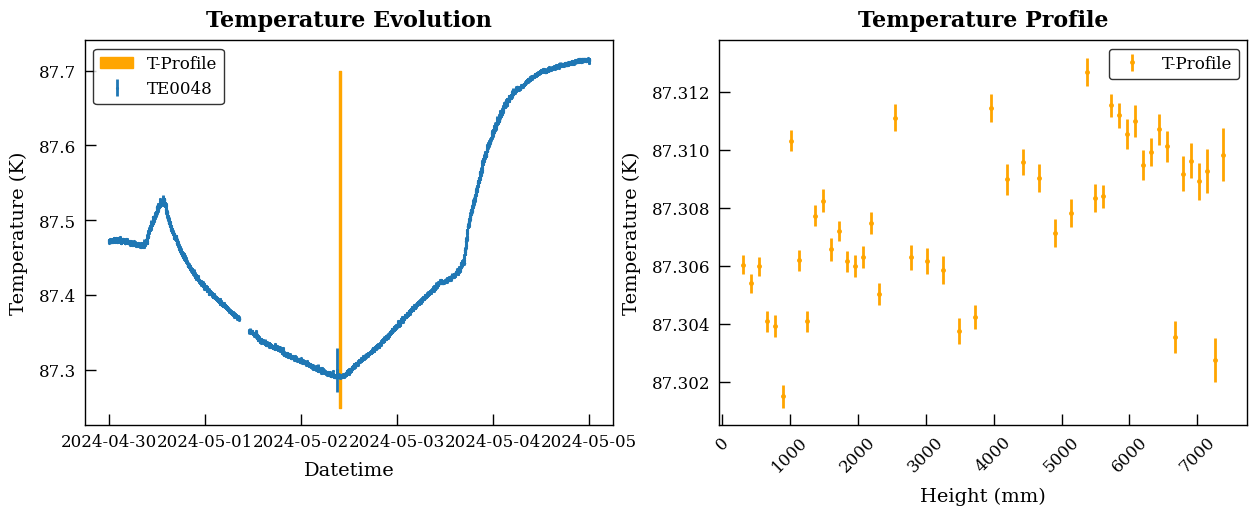

In [6]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
plots.plot_temp_evolution(
    data=data_1, data_err=data_err_1, channel="TE0048",
    tmax=300, tmin=87.2, tmax_err=1,
    axes=axes[0]
)
# axes[0].axvline(datetime.datetime(2024, 5, 3, 10, 30, 0), label="Recirculation ON", color="red")
# axes[0].axvline(datetime.datetime(2024, 5, 2, 10, 8, 0), label=f"ALL CE ON: {datetime.datetime(2024, 5, 2, 10, 8, 0)}", color="green")
axes[0].set_xlabel("Datetime")
axes[0].set_ylabel("Temperature (K)")
axes[0].set_title("Temperature Evolution")

profile = tools.make_tgrad_profile(
    data=data_1, data_err=data_err_1,
    date_ini=datetime.datetime(2024, 5, 2, 9, 35, 0), date_end=datetime.datetime(2024, 5, 2, 10, 5, 0),
    ref="40525", save_path=None
)
axes[1].errorbar(profile["Y"].to_numpy(), profile["temp"].to_numpy(), yerr=profile["temp_err"].to_numpy(), fmt="o", color="orange", label="T-Profile")
axes[0].fill_between(
    [datetime.datetime(2024, 5, 2, 9, 35, 0), datetime.datetime(2024, 5, 2, 10, 5, 0)],
    87.25, 87.7, color="orange", alpha=1, label="T-Profile"
)
axes[1].set_xlabel("Height (mm)")
axes[1].set_ylabel("Temperature (K)")
axes[1].set_title("Temperature Profile")
axes[0].legend()
axes[1].legend();

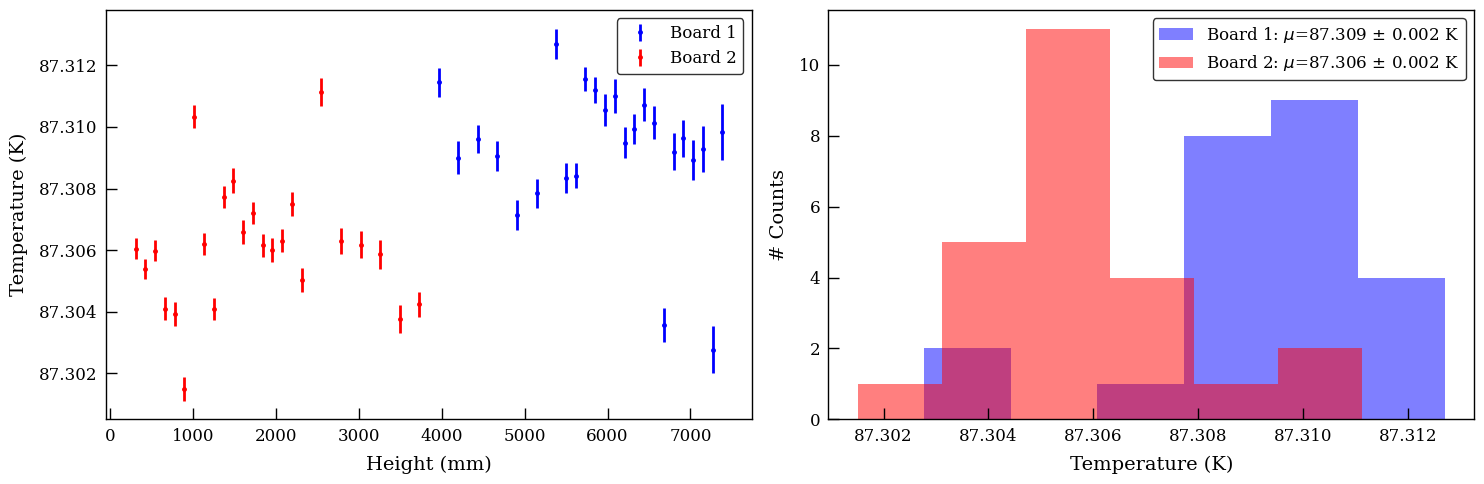

In [7]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

axes[0].errorbar(profile.loc[(profile["BOARD"]==1)]["Y"].to_numpy(), profile.loc[(profile["BOARD"]==1)]["temp"].to_numpy(),
                 yerr=profile.loc[(profile["BOARD"]==1)]["temp_err"].to_numpy(),
                 fmt="o", color="blue", label="Board 1")
axes[0].errorbar(profile.loc[(profile["BOARD"]==2)]["Y"].to_numpy(), profile.loc[(profile["BOARD"]==2)]["temp"].to_numpy(),
                 yerr=profile.loc[(profile["BOARD"]==2)]["temp_err"].to_numpy(),
                 fmt="o", color="red", label="Board 2")
axes[0].legend()
axes[1].hist(profile.loc[(profile["BOARD"]==1)]["temp"].to_numpy(),
             bins=6, color="blue", alpha=0.5,
             label=fr'Board 1: $\mu$={profile.loc[(profile["BOARD"]==1)]["temp"].mean():.3f} $\pm$ {profile.loc[(profile["BOARD"]==1)]["temp"].std():.3f} K')
axes[1].hist(profile.loc[(profile["BOARD"]==2)]["temp"].to_numpy(), bins=6, color="red", alpha=0.5,
             label=fr'Board 2: $\mu$={profile.loc[(profile["BOARD"]==2)]["temp"].mean():.3f} $\pm$ {profile.loc[(profile["BOARD"]==2)]["temp"].std():.3f} K')
axes[1].legend()
axes[0].set_xlabel("Height (mm)")
axes[0].set_ylabel("Temperature (K)")
axes[1].set_xlabel("Temperature (K)")
axes[1].set_ylabel("# Counts")
fig.tight_layout()
diff_b1_b2 = np.mean(profile.loc[(profile["BOARD"]==1)]["temp"].to_numpy() - profile.loc[(profile["BOARD"]==2)]["temp"].to_numpy())
fig.savefig(fr"{path_to_save_plots}first_poff_with_second_poff_profile_hist.pdf", format="pdf")

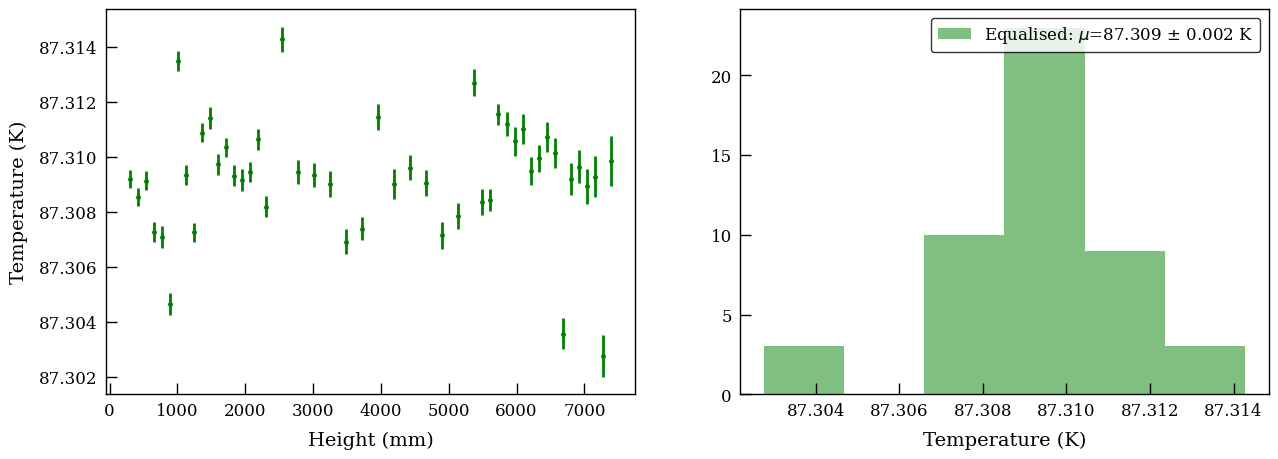

In [8]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
profile_equalised = profile.copy()
profile_equalised.loc[(profile["BOARD"]==2), "temp"] = profile.loc[(profile["BOARD"]==2), "temp"] + diff_b1_b2
axes[0].errorbar(
    profile_equalised["Y"].to_numpy(), profile_equalised["temp"].to_numpy(), yerr=profile["temp_err"].to_numpy(),
    fmt="o", color="green",
)
axes[1].hist(profile_equalised["temp"].to_numpy(), bins=6, color="green", alpha=0.5,
             label=fr'Equalised: $\mu$={profile_equalised["temp"].mean():.3f} $\pm$ {profile_equalised["temp"].std():.3f} K')
axes[1].legend()
axes[0].set_xlabel("Height (mm)")
axes[0].set_ylabel("Temperature (K)")
axes[1].set_xlabel("Temperature (K)")
fig.savefig(fr"{path_to_save_plots}first_poff_with_second_poff_profile_hist_equalised.pdf", format="pdf")

# Second Pumps-Off

In [9]:
tini_2 = datetime.datetime(2024, 11, 28, 0, 0, 0)
tend_2 = datetime.datetime(2024, 12, 5, 0, 0, 0)
data_2, data_err_2 = utils.load_data(
    tini=tini_2,
    tend=tend_2
)

Text(0.5, 1.0, 'First Pumps-Off: Temperature Evolution')

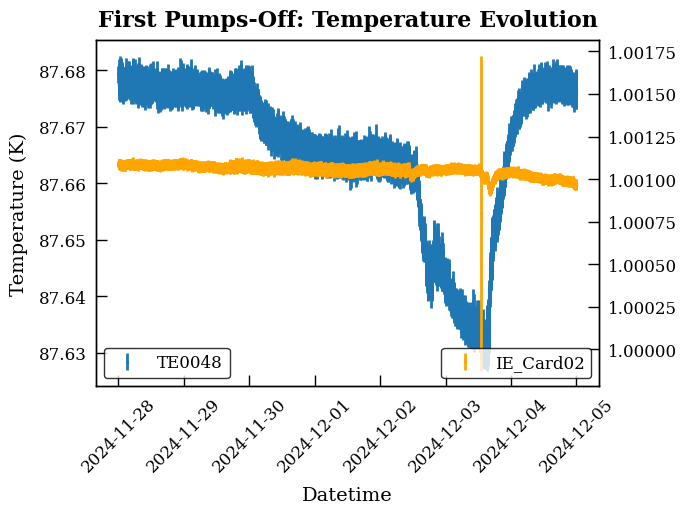

In [10]:
fig, axes = plt.subplots(1, 1)
plots.plot_temp_evolution(
    data=data_2, data_err=data_err_2, channel="TE0048",
    tmax=300, tmin=87.2, tmax_err=1,
    axes=axes
)
#axes.axvline(datetime.datetime(2024, 5, 3, 13, 30, 0), label="Recirculation ON", color="red")
#axes.axvline(datetime.datetime(2024, 12, 3, 14, 30, 0), label="Recirculation ON", color="orange")
axes2 = axes.twinx()
plots.plot_temp_evolution(
    data=data_2, data_err=data_err_2, channel="IE_Card02",
    tmax=1.0017, tmin=0.9, tmax_err=1,
    axes=axes2, color="orange"
)
# axes.axvline(datetime.datetime(2024, 5, 3, 10, 30, 0), label="Recirculation ON", color="red")
# axes.axvline(datetime.datetime(2024, 5, 2, 10, 8, 0), label=f"ALL CE ON: {datetime.datetime(2024, 5, 2, 10, 8, 0)}", color="green")
axes.legend()
axes2.legend(loc="lower right")
axes.set_xlabel("Datetime")
axes.set_ylabel("Temperature (K)")
axes.set_title("First Pumps-Off: Temperature Evolution")
# fig.savefig(f"{path_to_save_plots}np04_temp_evolution_TE0001.png", format="png")

Text(0.5, 1.0, 'First Pumps-Off: Temperature Evolution')

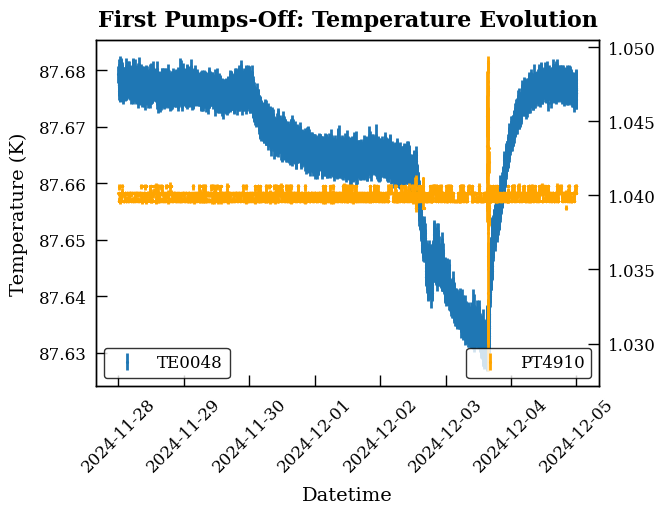

In [11]:
fig, axes = plt.subplots(1, 1)
plots.plot_temp_evolution(
    data=data_2, data_err=data_err_2, channel="TE0048",
    tmax=300, tmin=87.2, tmax_err=1,
    axes=axes
)
#axes.axvline(datetime.datetime(2024, 5, 3, 13, 30, 0), label="Recirculation ON", color="red")
#axes.axvline(datetime.datetime(2024, 12, 3, 14, 30, 0), label="Recirculation ON", color="orange")
axes2 = axes.twinx()
plots.plot_temp_evolution(
    data=data_2, data_err=data_err_2, channel="PT4910",
    tmax=1.05, tmin=1.03, tmax_err=1e-2,
    axes=axes2, color="orange"
)
# axes.axvline(datetime.datetime(2024, 5, 3, 10, 30, 0), label="Recirculation ON", color="red")
# axes.axvline(datetime.datetime(2024, 5, 2, 10, 8, 0), label=f"ALL CE ON: {datetime.datetime(2024, 5, 2, 10, 8, 0)}", color="green")
axes.legend()
axes2.legend(loc="lower right")
axes.set_xlabel("Datetime")
axes.set_ylabel("Temperature (K)")
axes.set_title("First Pumps-Off: Temperature Evolution")
# fig.savefig(f"{path_to_save_plots}np04_temp_evolution_TE0001.png", format="png")

/afs/cern.ch/work/j/jcapotor/software/rtd/pdhd/ana/tools.py:96: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['39666' '39665' '39664' '39667' '39661' '39660' '39655' '39654' '39653'
 '39652' '99999' '39651' '39650' '40526' '40525' '40524' '39659' '39658'
 '39657' '39649' '39648' '39647' '39646' '39644' '39630' '39629' '39628'
 '39627' '39626' '39625' '39624' '39623' '39622' '39621' '39620' '39619'
 '40533' '40530' '40531' '40529' '39614' '39613' '39612' '39611' '39610'
 '39609' '39608' '39607']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  selection_end.loc[:, "CAL-ID"] = selection_end["CAL-ID"].astype(int).astype(str)


Profile not saved.
Index(['temp', 'DCS-ID', 'SC-ID', 'BOARD', 'SLOT', 'SYSTEM', 'NAME', 'W-CABLE',
       'FLANGE', 'CHAN', 'X', 'Y', 'Z', 'COMMENT', 'COMMENT2', 'temp_err'],
      dtype='object')


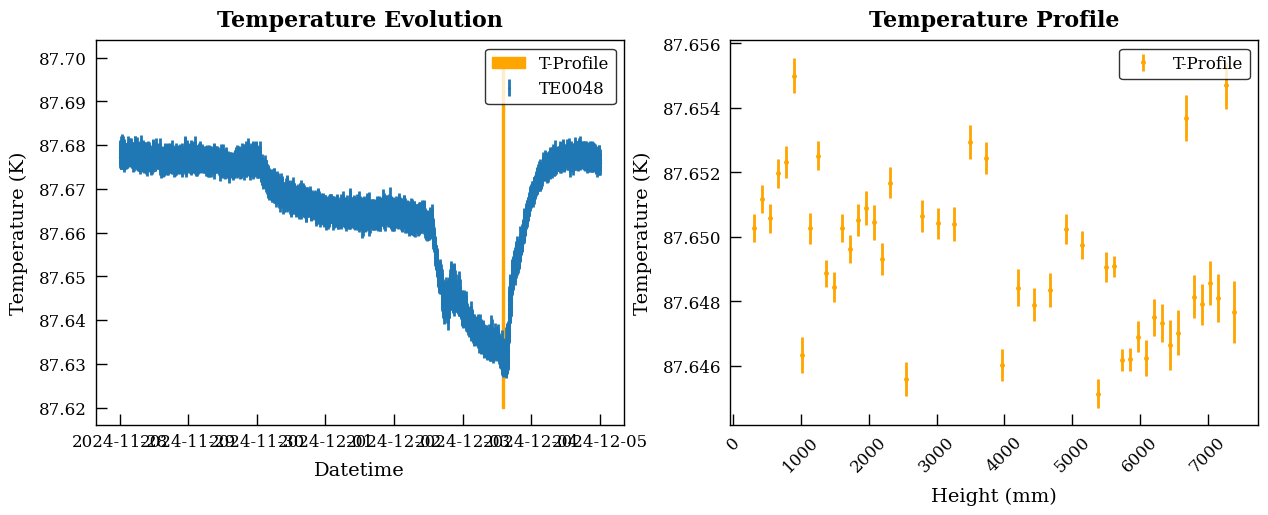

In [12]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
plots.plot_temp_evolution(
    data=data_2, data_err=data_err_2, channel="TE0048",
    tmax=300, tmin=87.2, tmax_err=1,
    axes=axes[0]
)
# axes[0].axvline(datetime.datetime(2024, 5, 3, 10, 30, 0), label="Recirculation ON", color="red")
# axes[0].axvline(datetime.datetime(2024, 5, 2, 10, 8, 0), label=f"ALL CE ON: {datetime.datetime(2024, 5, 2, 10, 8, 0)}", color="green")
axes[0].set_xlabel("Datetime")
axes[0].set_ylabel("Temperature (K)")
axes[0].set_title("Temperature Evolution")

profile = tools.make_tgrad_profile(
    data=data_2, data_err=data_err_2,
    date_ini=datetime.datetime(2024, 12, 3, 13, 50, 0), date_end=datetime.datetime(2024, 12, 3, 14, 30, 0),
    path_to_calib="/eos/user/j/jcapotor/RTDdata/calib/TGrad/POFF/poff_2024-05-02 09:35:00_2024-05-02 10:05:00.pkl",
    ref="40525", save_path=None
)
print(profile.columns)
axes[1].errorbar(profile["Y"].to_numpy(), profile["temp"].to_numpy(), yerr=profile["temp_err"].to_numpy(), fmt="o", color="orange", label="T-Profile")
axes[0].fill_between(
    [datetime.datetime(2024, 12, 3, 13, 50, 0), datetime.datetime(2024, 12, 3, 14, 30, 0)],
    87.62, 87.7, color="orange", alpha=1, label="T-Profile"
)
axes[1].set_xlabel("Height (mm)")
axes[1].set_ylabel("Temperature (K)")
axes[1].set_title("Temperature Profile")
axes[0].legend()
axes[1].legend();

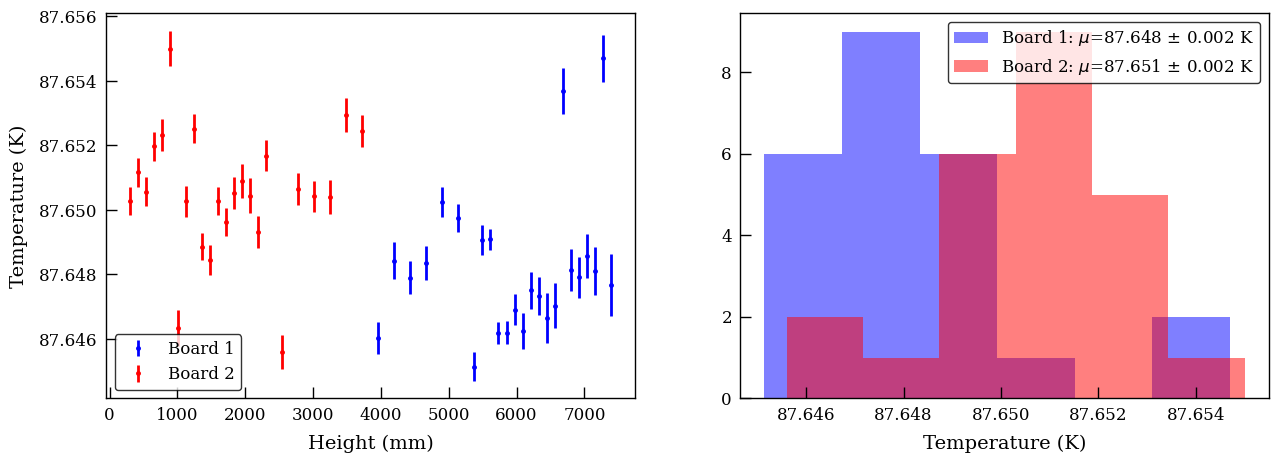

In [13]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

axes[0].errorbar(profile.loc[(profile["BOARD"]==1)]["Y"].to_numpy(), profile.loc[(profile["BOARD"]==1)]["temp"].to_numpy(),
                 yerr=profile.loc[(profile["BOARD"]==1)]["temp_err"].to_numpy(),
                 fmt="o", color="blue", label="Board 1")
axes[0].errorbar(profile.loc[(profile["BOARD"]==2)]["Y"].to_numpy(), profile.loc[(profile["BOARD"]==2)]["temp"].to_numpy(),
                 yerr=profile.loc[(profile["BOARD"]==2)]["temp_err"].to_numpy(),
                 fmt="o", color="red", label="Board 2")
axes[0].legend()
axes[1].hist(profile.loc[(profile["BOARD"]==1)]["temp"].to_numpy(),
             bins=6, color="blue", alpha=0.5,
             label=fr'Board 1: $\mu$={profile.loc[(profile["BOARD"]==1)]["temp"].mean():.3f} $\pm$ {profile.loc[(profile["BOARD"]==1)]["temp"].std():.3f} K')
axes[1].hist(profile.loc[(profile["BOARD"]==2)]["temp"].to_numpy(), bins=6, color="red", alpha=0.5,
             label=fr'Board 2: $\mu$={profile.loc[(profile["BOARD"]==2)]["temp"].mean():.3f} $\pm$ {profile.loc[(profile["BOARD"]==2)]["temp"].std():.3f} K')
axes[1].legend()
axes[0].set_xlabel("Height (mm)")
axes[0].set_ylabel("Temperature (K)")
axes[1].set_xlabel("Temperature (K)")
diff_b1_b2 = np.mean(profile.loc[(profile["BOARD"]==1)]["temp"].to_numpy() - profile.loc[(profile["BOARD"]==2)]["temp"].to_numpy())

Text(0.5, 0, 'Temperature (K)')

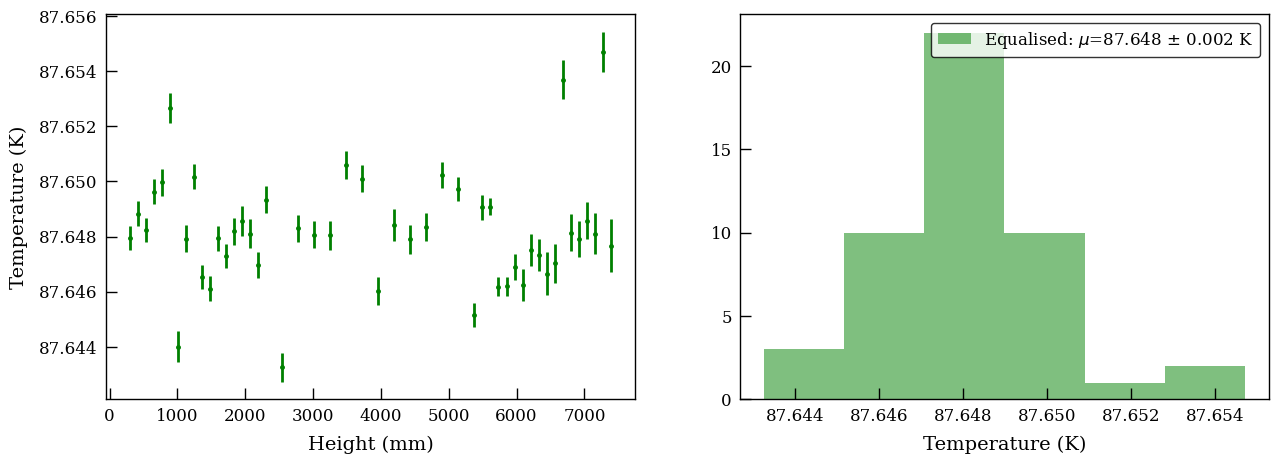

In [14]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
profile_equalised = profile.copy()
profile_equalised.loc[(profile["BOARD"]==2), "temp"] = profile.loc[(profile["BOARD"]==2), "temp"] + diff_b1_b2
axes[0].errorbar(
    profile_equalised["Y"].to_numpy(), profile_equalised["temp"].to_numpy(), yerr=profile["temp_err"].to_numpy(),
    fmt="o", color="green",
)
axes[1].hist(profile_equalised["temp"].to_numpy(), bins=6, color="green", alpha=0.5,
             label=fr'Equalised: $\mu$={profile_equalised["temp"].mean():.3f} $\pm$ {profile_equalised["temp"].std():.3f} K')
axes[1].legend()
axes[0].set_xlabel("Height (mm)")
axes[0].set_ylabel("Temperature (K)")
axes[1].set_xlabel("Temperature (K)")

# Comparison of Laboratory & Pumps-Off Calibrations

/afs/cern.ch/work/j/jcapotor/software/rtd/pdhd/ana/tools.py:96: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['39666' '39665' '39664' '39667' '39661' '39660' '39655' '39654' '39653'
 '39652' '99999' '39651' '39650' '40526' '40525' '40524' '39659' '39658'
 '39657' '39649' '39648' '39647' '39646' '39644' '39630' '39629' '39628'
 '39627' '39626' '39625' '39624' '39623' '39622' '39621' '39620' '39619'
 '40533' '40530' '40531' '40529' '39614' '39613' '39612' '39611' '39610'
 '39609' '39608' '39607']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  selection_end.loc[:, "CAL-ID"] = selection_end["CAL-ID"].astype(int).astype(str)
/afs/cern.ch/work/j/jcapotor/software/rtd/pdhd/ana/tools.py:96: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['39666' '39665' '39664' '39667' '39661' '39660' '39655' '39654' '39653'

Profile not saved.
Profile not saved.


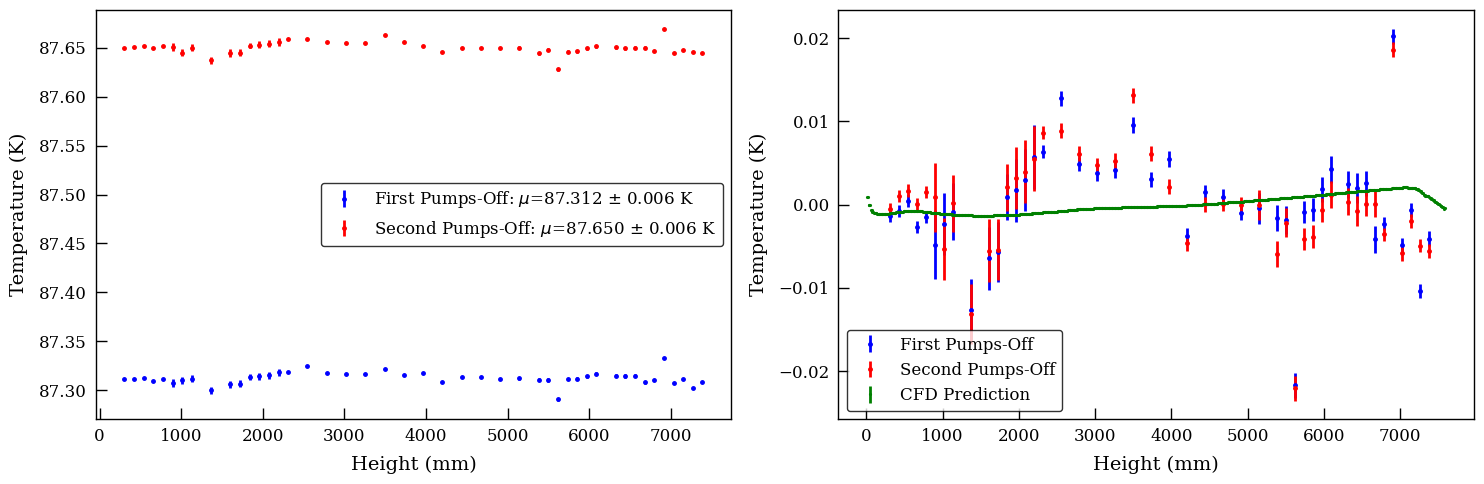

In [15]:

profile_lab_1= tools.make_tgrad_profile(
    data=data_1, data_err=data_err_1,
    date_ini=datetime.datetime(2024, 5, 2, 9, 35, 0), date_end=datetime.datetime(2024, 5, 2, 10, 5, 0),
    path_to_calib="/eos/user/j/jcapotor/RTDdata/calib/TGrad/LAR2023/lar2023_tree_method_avg_path.pkl",
    ref="40525", save_path=None
)

profile_lab_2 = tools.make_tgrad_profile(
    data=data_2, data_err=data_err_2,
    date_ini=datetime.datetime(2024, 12, 3, 13, 50, 0), date_end=datetime.datetime(2024, 12, 3, 14, 30, 0),
    path_to_calib="/eos/user/j/jcapotor/RTDdata/calib/TGrad/LAR2023/lar2023_tree_method_avg_path.pkl",
    ref="40525", save_path=None
)

cfd_sim = utils.load_cfd_sim()
cfd_sim = cfd_sim.loc[(cfd_sim["Y"] > 0)]

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
axes[0].errorbar(profile_lab_1["Y"].to_numpy(), profile_lab_1["temp"].to_numpy(), yerr=profile_lab_1["temp_err"].to_numpy(), fmt="o", color="blue",
                 label=fr'First Pumps-Off: $\mu$={profile_lab_1["temp"].mean():.3f} $\pm$ {profile_lab_1["temp"].std():.3f} K')
axes[0].errorbar(profile_lab_2["Y"].to_numpy(), profile_lab_2["temp"].to_numpy(), yerr=profile_lab_2["temp_err"].to_numpy(), fmt="o", color="red",
                 label=fr'Second Pumps-Off: $\mu$={profile_lab_2["temp"].mean():.3f} $\pm$ {profile_lab_2["temp"].std():.3f} K')

axes[1].errorbar(profile_lab_1["Y"].to_numpy(), (profile_lab_1["temp"] - profile_lab_1["temp"].mean()).to_numpy(), yerr=profile_lab_1["temp_err"].to_numpy(), fmt="o", color="blue", label="First Pumps-Off")
axes[1].errorbar(profile_lab_2["Y"].to_numpy(), (profile_lab_2["temp"] - profile_lab_2["temp"].mean()).to_numpy(), yerr=profile_lab_2["temp_err"].to_numpy(), fmt="o", color="red", label="Second Pumps-Off")
axes[1].errorbar(cfd_sim["Y"].to_numpy(), (cfd_sim["temp"] - cfd_sim["temp"].mean()).to_numpy(), yerr=cfd_sim["temp_err"].to_numpy(), fmt=".", color="green", label="CFD Prediction")
# axes.errorbar(profile["Y"].to_numpy(), profile["temp"].to_numpy(), yerr=profile["temp_err"].to_numpy(), fmt="o", color="blue", label="Pumps-Off Calib.")
axes[0].set_xlabel("Height (mm)")
axes[1].set_xlabel("Height (mm)")
axes[0].set_ylabel("Temperature (K)")
axes[1].set_ylabel("Temperature (K)")
axes[0].legend()
axes[1].legend()
fig.tight_layout()
fig.savefig(fr"{path_to_save_plots}first_poff_second_poff_profile_with_lar2023.pdf", format="pdf")

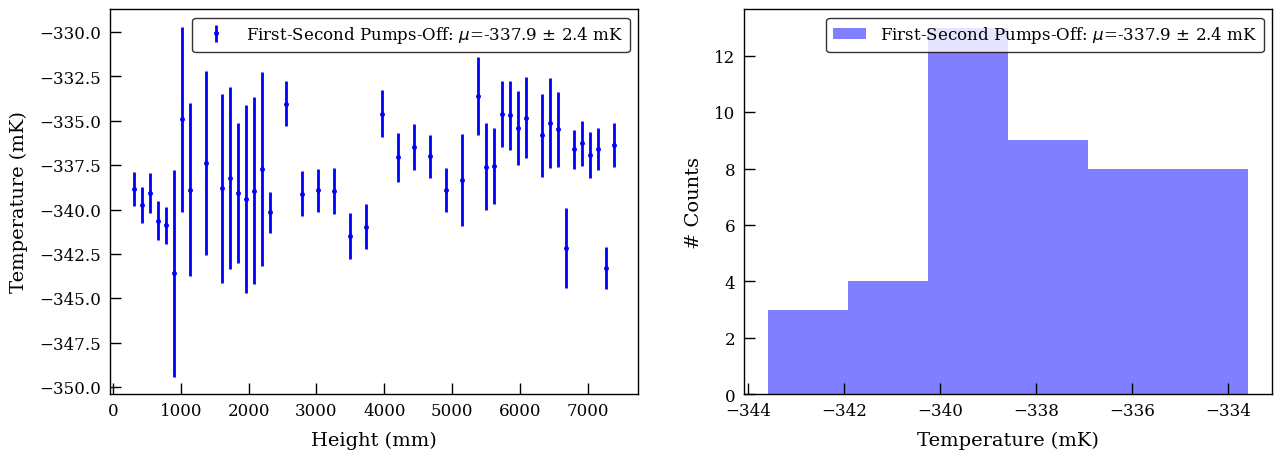

In [19]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
axes[0].errorbar(profile_lab_1["Y"].to_numpy(), 1e3*(profile_lab_1["temp"]-profile_lab_2["temp"]).to_numpy(),
                 yerr=1e3*np.sqrt(profile_lab_1["temp_err"].to_numpy()**2 + profile_lab_2["temp_err"].to_numpy()**2),
                 fmt="o", color="blue",
                 label=fr'First-Second Pumps-Off: $\mu$={1e3*(profile_lab_1["temp"]-profile_lab_2["temp"]).mean():.1f} $\pm$ {1e3*(profile_lab_1["temp"]-profile_lab_2["temp"]).std():.1f} mK')
axes[1].hist(1e3*(profile_lab_1["temp"]-profile_lab_2["temp"]).to_numpy(), bins=6, color="blue", alpha=0.5,
             label=fr'First-Second Pumps-Off: $\mu$={1e3*(profile_lab_1["temp"]-profile_lab_2["temp"]).mean():.1f} $\pm$ {1e3*(profile_lab_1["temp"]-profile_lab_2["temp"]).std():.1f} mK')
axes[0].legend()
axes[1].legend()
axes[0].set_xlabel("Height (mm)")
axes[0].set_ylabel("Temperature (mK)")
axes[1].set_xlabel("Temperature (mK)")
axes[1].set_ylabel("# Counts")
fig.savefig(fr"{path_to_save_plots}first_poff_second_poff_profile_diff_hist.pdf", format="pdf")

            temp          DCS-ID   SC-ID  BOARD  SLOT SYSTEM NAME W-CABLE  \
39644  87.317868  47890646958362  TE0024    1.0   4.0  TGRAD  NaN     1.4   
39646  87.308663  47890630181146  TE0023    1.0   4.0  TGRAD  NaN     1.4   
39647  87.313872  47890613403930  TE0022    1.0   4.0  TGRAD  NaN     1.4   
39648  87.313367  47890596626714  TE0021    1.0   4.0  TGRAD  NaN     1.4   
39649  87.311423  47890579849498  TE0020    1.0   4.0  TGRAD  NaN     1.4   
39650  87.314247  47890462408986  TE0013    1.0   3.0  TGRAD  NaN     1.3   
39651  87.316666  47890445631770  TE0012    1.0   2.0  TGRAD  NaN     1.2   
39652  87.314835  47890412077338  TE0010    1.0   2.0  TGRAD  NaN     1.2   
39653  87.314383  47890395300122  TE0009    1.0   2.0  TGRAD  NaN     1.2   
39654  87.314949  47890378522906  TE0008    1.0   2.0  TGRAD  NaN     1.2   
39655  87.308225  47890361745690  TE0007    1.0   2.0  TGRAD  NaN     1.2   
39657  87.311945  47890563072282  TE0019    1.0   4.0  TGRAD  NaN     1.4   

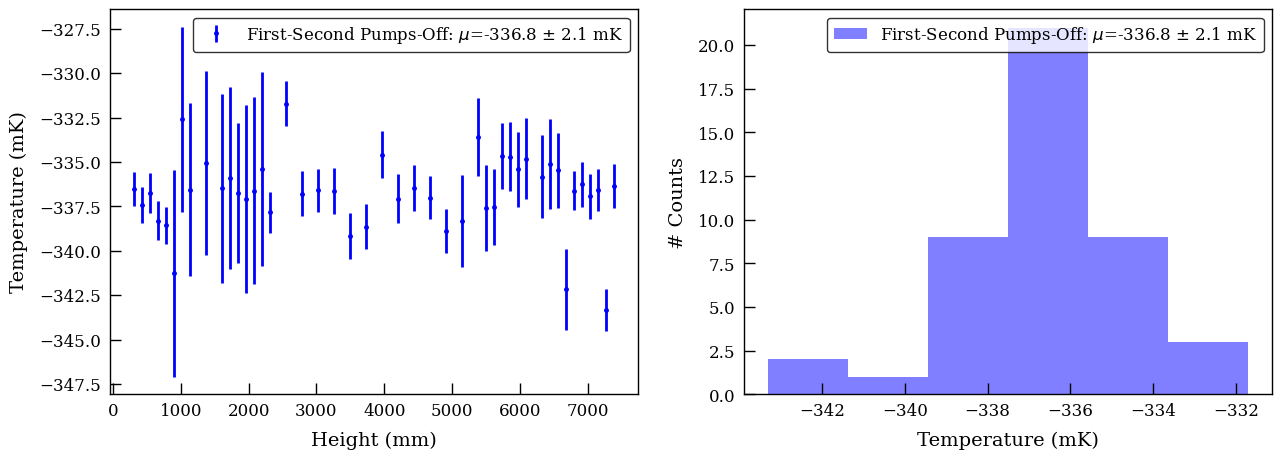

In [20]:
def MUX_correction(dataset):
    print(dataset.loc[(dataset["BOARD"]==1)])
    diff_b1_b2 = (dataset.loc[(dataset["BOARD"]==1)]["temp"].mean() - dataset.loc[(dataset["BOARD"]==2)]["temp"].mean())
    corrected_dataset = dataset.copy()
    corrected_dataset.loc[(corrected_dataset["BOARD"]==2), "temp"] = corrected_dataset.loc[(corrected_dataset["BOARD"]==2), "temp"] + diff_b1_b2
    return corrected_dataset

fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
profile_lab_1_corrected = MUX_correction(profile_lab_1)
profile_lab_2_corrected = MUX_correction(profile_lab_2)
axes[0].errorbar(profile_lab_1_corrected["Y"].to_numpy(),
                 1e3*(profile_lab_1_corrected["temp"]-profile_lab_2_corrected["temp"]).to_numpy(),
                 yerr=1e3*np.sqrt(profile_lab_1_corrected["temp_err"].to_numpy()**2 + profile_lab_2_corrected["temp_err"].to_numpy()**2), fmt="o", color="blue",
                 label=fr'First-Second Pumps-Off: $\mu$={1e3*(profile_lab_1_corrected["temp"]-profile_lab_2_corrected["temp"]).mean():.1f} $\pm$ {1e3*(profile_lab_1_corrected["temp"]-profile_lab_2_corrected["temp"]).std():.1f} mK')
axes[1].hist(1e3*(profile_lab_1_corrected["temp"]-profile_lab_2_corrected["temp"]).to_numpy(), bins=6, color="blue", alpha=0.5,
             label=fr'First-Second Pumps-Off: $\mu$={1e3*(profile_lab_1_corrected["temp"]-profile_lab_2_corrected["temp"]).mean():.1f} $\pm$ {1e3*(profile_lab_1_corrected["temp"]-profile_lab_2_corrected["temp"]).std():.1f} mK')
axes[0].legend()
axes[1].legend()
axes[0].set_xlabel("Height (mm)")
axes[0].set_ylabel("Temperature (mK)")
axes[1].set_xlabel("Temperature (mK)")
axes[1].set_ylabel("# Counts")
fig.savefig(fr"{path_to_save_plots}first_poff_second_poff_profile_diff_hist_MUC_corrected.pdf", format="pdf")

            temp          DCS-ID   SC-ID  BOARD  SLOT SYSTEM     NAME W-CABLE  \
39607  87.649825  47891049611546  TE0048    2.0   4.0  TGRAD  TGRAD48     2.4   
39608  87.651328  47891032834330  TE0047    2.0   4.0  TGRAD  TGRAD47     2.4   
39609  87.651955  47891016057114  TE0046    2.0   4.0  TGRAD  TGRAD46     2.4   
39610  87.650333  47890999279898  TE0045    2.0   4.0  TGRAD  TGRAD45     2.4   
39611  87.651779  47890982502682  TE0044    2.0   4.0  TGRAD  TGRAD44     2.4   
39612  87.651189  47890965725466  TE0043    2.0   4.0  TGRAD  TGRAD43     2.4   
39613  87.644993  47890948948250  TE0042    2.0   3.0  TGRAD  TGRAD42     2.3   
39614  87.650440  47890932171034  TE0041    2.0   3.0  TGRAD  TGRAD41     2.3   
39619  87.644891  47890848284954  TE0036    2.0   2.0  TGRAD  TGRAD36     2.2   
39620  87.652369  47890831507738  TE0035    2.0   2.0  TGRAD  TGRAD35     2.2   
39621  87.653514  47890814730522  TE0034    2.0   2.0  TGRAD  TGRAD34     2.2   
39622  87.654267  4789079795

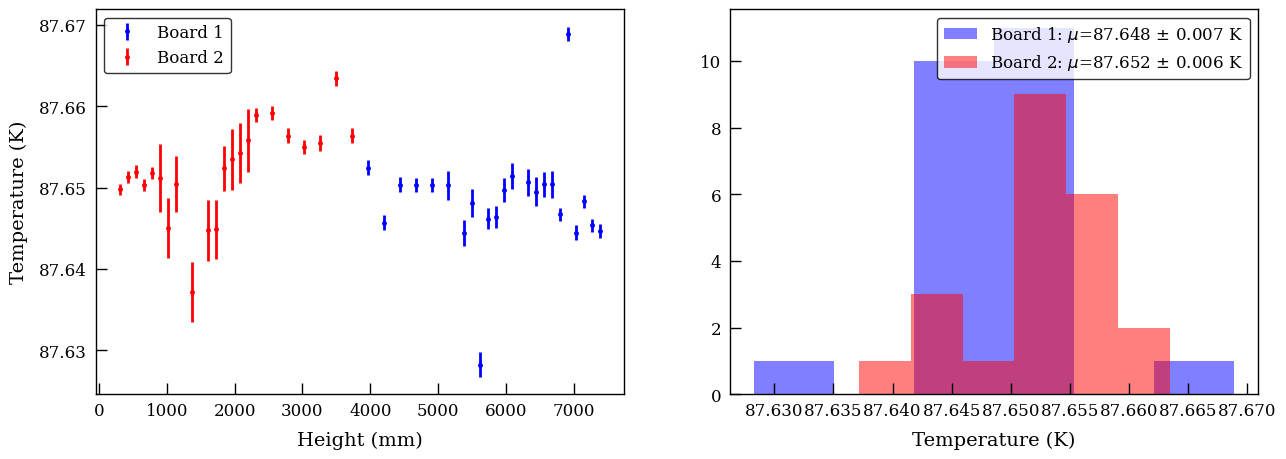

In [83]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

axes[0].errorbar(profile_lab.loc[(profile_lab["BOARD"]==1)]["Y"].to_numpy(), profile_lab.loc[(profile_lab["BOARD"]==1)]["temp"].to_numpy(),
                 yerr=profile_lab.loc[(profile_lab["BOARD"]==1)]["temp_err"].to_numpy(),
                 fmt="o", color="blue", label="Board 1")
axes[0].errorbar(profile_lab.loc[(profile_lab["BOARD"]==2)]["Y"].to_numpy(), profile_lab.loc[(profile_lab["BOARD"]==2)]["temp"].to_numpy(),
                 yerr=profile_lab.loc[(profile_lab["BOARD"]==2)]["temp_err"].to_numpy(),
                 fmt="o", color="red", label="Board 2")
axes[0].legend()
axes[1].hist(profile_lab.loc[(profile_lab["BOARD"]==1)]["temp"].to_numpy(),
             bins=6, color="blue", alpha=0.5,
             label=fr'Board 1: $\mu$={profile_lab.loc[(profile_lab["BOARD"]==1)]["temp"].mean():.3f} $\pm$ {profile_lab.loc[(profile_lab["BOARD"]==1)]["temp"].std():.3f} K')
axes[1].hist(profile_lab.loc[(profile_lab["BOARD"]==2)]["temp"].to_numpy(), bins=6, color="red", alpha=0.5,
             label=fr'Board 2: $\mu$={profile_lab.loc[(profile_lab["BOARD"]==2)]["temp"].mean():.3f} $\pm$ {profile_lab.loc[(profile_lab["BOARD"]==2)]["temp"].std():.3f} K')
axes[1].legend()
axes[0].set_xlabel("Height (mm)")
axes[0].set_ylabel("Temperature (K)")
axes[1].set_xlabel("Temperature (K)")
print(profile_lab)
diff_b1_b2 = np.mean(profile_lab.loc[(profile_lab["BOARD"]==1)]["temp"].to_numpy() - profile_lab.loc[(profile_lab["BOARD"]==2)]["temp"].to_numpy())

            temp          DCS-ID   SC-ID  BOARD  SLOT SYSTEM     NAME W-CABLE  \
39607  87.649825  47891049611546  TE0048    2.0   4.0  TGRAD  TGRAD48     2.4   
39608  87.651328  47891032834330  TE0047    2.0   4.0  TGRAD  TGRAD47     2.4   
39609  87.651955  47891016057114  TE0046    2.0   4.0  TGRAD  TGRAD46     2.4   
39610  87.650333  47890999279898  TE0045    2.0   4.0  TGRAD  TGRAD45     2.4   
39611  87.651779  47890982502682  TE0044    2.0   4.0  TGRAD  TGRAD44     2.4   
39612  87.651189  47890965725466  TE0043    2.0   4.0  TGRAD  TGRAD43     2.4   
39613  87.644993  47890948948250  TE0042    2.0   3.0  TGRAD  TGRAD42     2.3   
39614  87.650440  47890932171034  TE0041    2.0   3.0  TGRAD  TGRAD41     2.3   
39619  87.644891  47890848284954  TE0036    2.0   2.0  TGRAD  TGRAD36     2.2   
39620  87.652369  47890831507738  TE0035    2.0   2.0  TGRAD  TGRAD35     2.2   
39621  87.653514  47890814730522  TE0034    2.0   2.0  TGRAD  TGRAD34     2.2   
39622  87.654267  4789079795

Text(0.5, 0, 'Temperature (K)')

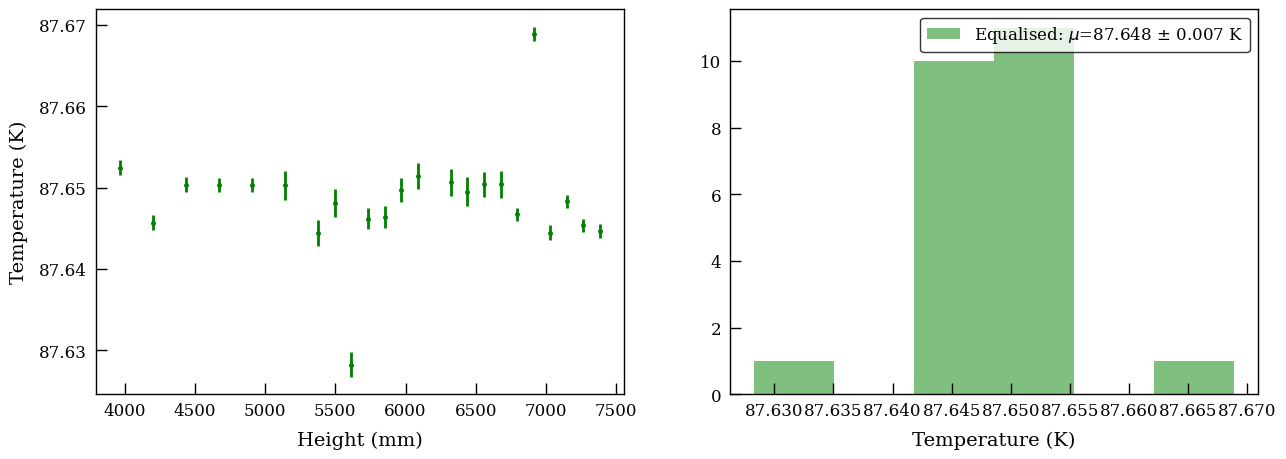

In [84]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
print(profile_lab)
profile_equalised = profile_lab.copy()
profile_equalised.loc[(profile_equalised["BOARD"]==2), "temp"] = profile_lab.loc[(profile_lab["BOARD"]==2), "temp"] + diff_b1_b2
axes[0].errorbar(
    profile_equalised["Y"].to_numpy(), profile_equalised["temp"].to_numpy(), yerr=profile_equalised["temp_err"].to_numpy(),
    fmt="o", color="green",
)
axes[1].hist(profile_equalised["temp"].to_numpy(), bins=6, color="green", alpha=0.5,
             label=fr'Equalised: $\mu$={profile_equalised["temp"].mean():.3f} $\pm$ {profile_equalised["temp"].std():.3f} K')
axes[1].legend()
axes[0].set_xlabel("Height (mm)")
axes[0].set_ylabel("Temperature (K)")
axes[1].set_xlabel("Temperature (K)")